## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [6]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [9]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-09-28,140.589996,283.519989,14.31,105.730003
2021-09-29,142.020004,284.000000,14.30,106.279999
2021-09-30,139.800003,281.920013,14.16,103.029999
2021-10-01,139.580002,289.100006,14.16,105.820000
2021-10-04,138.789993,283.109985,14.35,104.900002


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [10]:
mydata.iloc[0]

PG       8.063840
MSFT     2.379200
F        4.380182
GE      32.906116
Name: 1995-01-03 00:00:00, dtype: float64

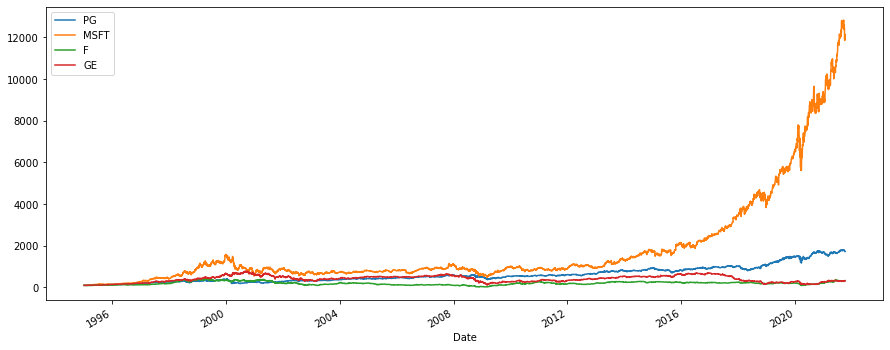

In [11]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [12]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004891
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [14]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [16]:
annual_returns = returns.mean() * 250
np.dot(annual_returns, weights)

0.14385482132183003

Transform the result into a percentage form. 

In [18]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

14.385 %


Is the return of this portfolio satisfactory?